In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
theta=np.loadtxt("esp_cara_cobre_LIF.txt", usecols=0)
I=np.loadtxt("esp_cara_cobre_LIF.txt", usecols=1)
I=I[theta>5.8]
I=I/sum(I)
theta=theta[theta>5.8]



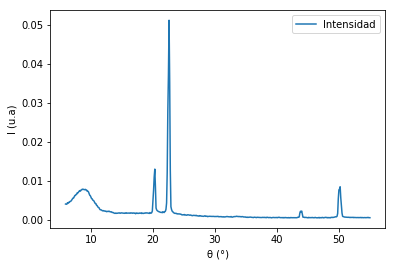

In [21]:
plt.figure(figsize=(6,4))
plt.plot(theta, I, label='Intensidad')
plt.xlabel('\u03b8 (°)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('inteanguloLiF.png')

In [22]:
d=2.04E-10

In [23]:
landa=2*d*np.sin(theta*np.pi/180)
landa=landa*(10**10)

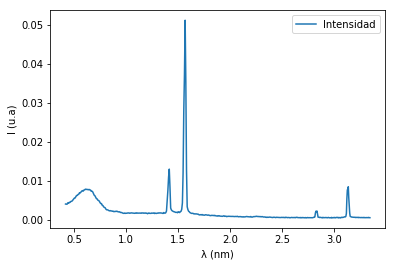

In [24]:
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('intelongLiF.png')

In [25]:
Ialp=max(I)
Ibet=max(I[landa<1.5])
Kalp=landa[I==Ialp][0]
Kbet=landa[I==Ibet][0]

In [26]:
Kalp, Kbet

(1.567924916451999, 1.415497458418884)

0.007499999999999951

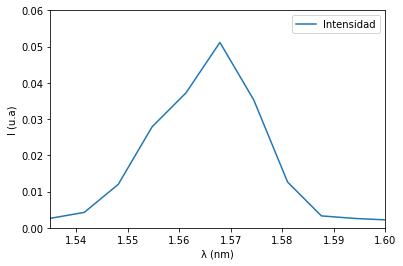

In [27]:
#Incertidumbres Kalph
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.535,1.6,0,0.06])
plt.legend()
sigmaAlp=abs(1.560-1.575)/2
sigmaAlp
#Incertidumbre Kalph=0.007 nm

0.007499999999999951

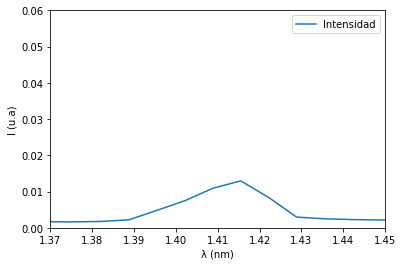

In [28]:
#Incertidumbres Kbet
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.37,1.45,0,0.06])
plt.legend()
sigmaBet=abs(1.405-1.420)/2
sigmaBet
#Incertidumbre Kbet=0.007 nm

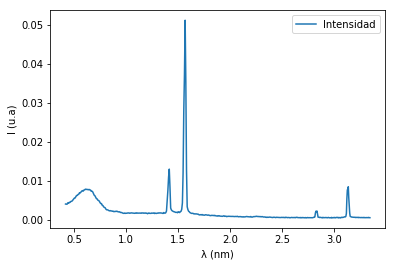

In [29]:
#Analisis de segundo orden
landaV=landa
IV=I
plt.figure(figsize=(6,4))
plt.plot(landaV, IV, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()

In [30]:
landa=landaV[landaV>2.5]*0.5
I=IV[landaV>2.5]

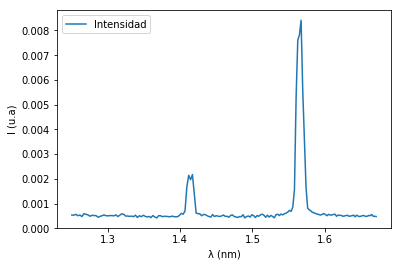

In [31]:
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()

1.414

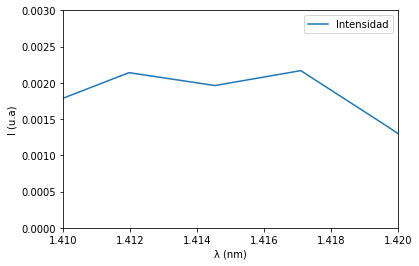

In [32]:
#Beta
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.41,1.42,0,0.003])
plt.legend()
Kbet2=1.414
Kbet2

1.566

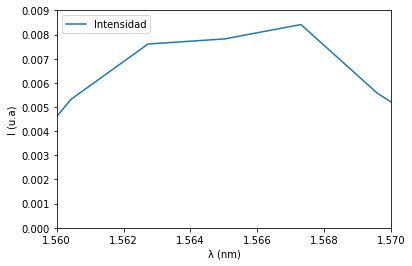

In [33]:
#Alpha
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.56,1.57,0,0.009])
plt.legend()
Kalp2=1.566
Kalp2

In [34]:
longAlp=(Kalp+Kalp2)/2
longBet=(Kbet+Kbet2)/2
h=6.62607004E-34
c=299792458
e=1.60217662E-19
print('La longitud de onda de Ka dio', longAlp,'+- 0.007', 'y la de Kb', longBet, '+- 0.007')

La longitud de onda de Ka dio 1.5669624582259996 +- 0.007 y la de Kb 1.414748729209442 +- 0.007


In [40]:
print('Ka=', 1.567,'+-0.007 nm y Kb=', 1.415, '+- 0.07 nm')

Ka= 1.567 +-0.007 nm y Kb= 1.415 +- 0.07 nm


In [43]:
Ealp=h*c/(longAlp*(10**-10))/e
Ebet=h*c/(longBet*(10**-10))/e
DEa=abs(-h*c/(longAlp)**2)*0.07*10**10/e
DEb=abs(-h*c/(longBet)**2)*0.07*10**10/e

In [46]:
Ealp, Ebet, DEa, DEb

(7912.391060005414, 8763.690321715087, 353.4656310958638, 433.61645064905275)

In [48]:
print('Ea=', 7.9,'+-', 0.3, ' y Eb=', 8.8, '+-', 0.4, 'MeV')

Ea= 7.9 +- 0.3  y Eb= 8.8 +- 0.4 MeV


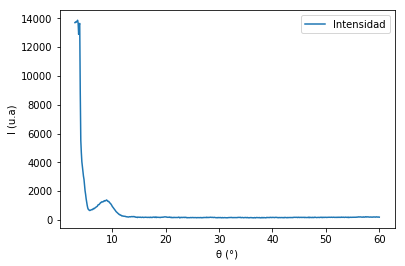

In [36]:
#Análisis para el cristal KBr
theta=np.loadtxt("esp_cara_cobre_KBr.txt", usecols=0)
I=np.loadtxt("esp_cara_cobre_KBr.txt", usecols=1)
plt.figure(figsize=(6,4))
plt.plot(theta, I, label='Intensidad')
plt.xlabel('\u03b8 (°)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('inteanguloKBr.png')


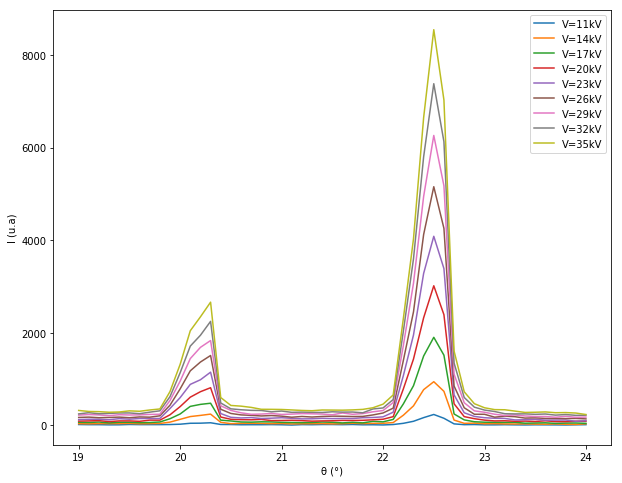

In [73]:
#Analisis en funcion de corriente y voltaje
theta=np.loadtxt('voltaje_variable.txt', usecols=0)
Voltajes=np.arange(11,36,3)
plt.figure(figsize=(10,8))
for i in range(1,10):
    I=np.loadtxt('voltaje_variable.txt', usecols=i)
    plt.plot(theta, I, label='V='+str(Voltajes[i-1])+'kV')
    plt.xlabel('\u03b8 (°)')
    plt.ylabel('I (u.a)')
    plt.savefig('EspectroVsVoltaje.png')
    plt.legend()
#Corriente =1mA

EL intercepto dio: 3.113436710691634 y la pendiente,  1.1839356498185223


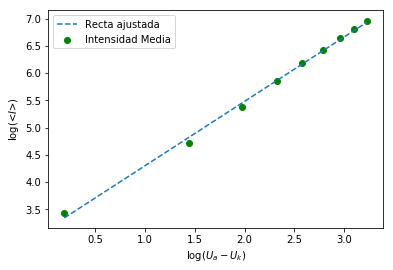

In [92]:
Voltajes=np.arange(11,36,3)
Uk=9.79
IntensidadesMedias=np.zeros(len(Voltajes))
plt.figure(figsize=(6,4))
for i in range(1,10):
    I=np.loadtxt('voltaje_variable.txt', usecols=i)
    IntensidadesMedias[i-1]=np.mean(I)
X=np.log(Voltajes-Uk)
Y=np.log(IntensidadesMedias)
fit=np.poly1d(np.polyfit(X,Y, 1))(X)
plt.scatter(X, Y, label='Intensidad Media', c='green')
plt.plot(X,fit, ls='dashed', label='Recta ajustada')
plt.xlabel('log($U_a - U_k$)')
plt.ylabel('log(<$I$>)')
plt.savefig('ImediaVsVoltaje.png')
plt.legend()
print('EL intercepto dio:',np.polyfit(X,Y, 1)[1], 'y la pendiente, ', np.polyfit(X,Y, 1)[0])

